In [44]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [4]:
#read dataset



player_box = pd.read_csv("final_proj_data/basketball/Basketball-PlayerBoxScore.csv") 
box = pd.read_csv("final_proj_data/basketball/Basketball-BoxScores.csv") 
team_box = pd.read_csv("final_proj_data/basketball/Basketball-TeamBoxScores.csv") 
nba_standings = pd.read_csv("final_proj_data/basketball/Standings.csv") 
college = pd.read_csv("final_proj_data/basketball/college.csv") 
#officialBoxScore = pd.read_csv("./data/2012-18_officialBoxScore.csv")
#playerBoxScore = pd.read_csv("./data/2012-18_playerBoxScore.csv")
#teamBoxScore = pd.read_csv("./data/2012-18_teamBoxScore.csv")
#standings = pd.read_csv("./data/2012-18_standings.csv")

In [5]:
#preliminary data exploration
college.info()
college.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 34 columns):
Unnamed: 0          4576 non-null int64
active_from         4576 non-null int64
active_to           4576 non-null int64
birth_date          4547 non-null object
college             4274 non-null object
height              4575 non-null object
name                4576 non-null object
position            4575 non-null object
url                 4576 non-null object
weight              4570 non-null float64
NBA__3ptapg         3448 non-null float64
NBA__3ptpct         2953 non-null float64
NBA__3ptpg          3448 non-null float64
NBA_efgpct          3426 non-null float64
NBA_fg%             4548 non-null float64
NBA_fg_per_game     4576 non-null float64
NBA_fga_per_game    4576 non-null float64
NBA_ft%             4378 non-null float64
NBA_ft_per_g        4576 non-null float64
NBA_fta_p_g         4576 non-null float64
NBA_g_played        4576 non-null int64
NBA_ppg             4576 

,Unnamed: 0,active_from,active_to,weight,NBA__3ptapg,NBA__3ptpct,NBA__3ptpg,NBA_efgpct,NBA_fg%,NBA_fg_per_game,...,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
count,4576.000000,4576.000000,4576.000000,4570.000000,3448.000000,2953.000000,3448.000000,3426.000000,4548.000000,4576.000000,...,1871.000000,0.0,2582.000000,2583.000000,2598.000000,2594.000000,2592.000000,2598.000000,2598.000000,2598.000000
mean,2287.500000,1985.263330,1989.450393,208.915974,0.851885,0.236988,0.279118,0.451435,0.407901,2.458829,...,0.844094,NaN,10.274516,0.495974,5.052694,0.711055,4.029900,2.880716,98.307544,13.574057
std,1321.121746,21.060432,21.937301,26.243075,1.196153,0.161189,0.439907,0.100671,0.105117,1.807253,...,0.801787,NaN,3.633562,0.061320,1.780048,0.086036,1.598179,1.211084,30.447005,4.566653
min,0.000000,1947.000000,1947.000000,114.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,1.200000,0.201000,0.700000,0.295000,0.500000,0.300000,11.000000,1.600000
25%,1143.750000,1969.000000,1973.000000,190.000000,0.000000,0.125000,0.000000,0.421000,0.366000,1.100000,...,0.100000,NaN,7.900000,0.453000,3.800000,0.659000,2.900000,2.100000,76.000000,10.500000
50%,2287.500000,1987.000000,1992.000000,210.000000,0.300000,0.268000,0.100000,0.464000,0.423000,2.000000,...,0.700000,NaN,10.000000,0.492000,4.900000,0.720000,3.800000,2.800000,106.000000,13.400000
75%,3431.250000,2004.000000,2009.000000,225.000000,1.300000,0.340000,0.400000,0.498000,0.464000,3.400000,...,1.400000,NaN,12.300000,0.533500,6.000000,0.770000,4.900000,3.600000,123.000000,16.200000
max,4575.000000,2018.000000,2018.000000,360.000000,7.800000,1.000000,3.400000,1.500000,1.000000,12.100000,...,4.000000,NaN,38.100000,1.211000,16.700000,1.266000,14.400000,10.800000,152.000000,44.200000


# Part 1: Which college produces the best rebounders, 3 point shooters, scorers, defenders?

For this part, I measure a player's performance using NBA statistics rather than NCAA statistics. 

A quick look at which colleges produce the most basketball players.

In [6]:
#most popular basketball colleges
college['college'].value_counts().head(10)

University of Kentucky                   96
University of California, Los Angeles    87
University of North Carolina             87
University of Kansas                     67
Duke University                          67
Indiana University                       60
University of Notre Dame                 54
University of Louisville                 53
University of Michigan                   49
St. John's University                    47
Name: college, dtype: int64

If we just sort by NBA points per game, we see some notable players.

In [7]:
#lets just sort by points per game in the NBA and we see some notable names
college.sort_values(by=["NBA_ppg"], ascending = False)[['name', 'college', 'NBA_ppg']]


,name,college,NBA_ppg
2126,Michael Jordan,University of North Carolina,30.1
674,Wilt Chamberlain,University of Kansas,30.1
246,Elgin Baylor,"Albertson College of Idaho, Seattle University",27.4
1961,LeBron James,NaN,27.2
1088,Kevin Durant,University of Texas at Austin,27.1
...,...,...,...
2794,Jason Miskiri,George Mason University,0.0
299,Ben Bentil,Providence College,0.0
2639,Chris McCray,University of Maryland,0.0
3585,Alex Scales,University of Oregon,0.0


Without any data manipulation or analysis, let's see which college produces the best players (purely in terms of scoring)

In [8]:
#First glance, which college makes the best players (in terms of scoring)
college.groupby(['college']).mean().sort_values(by=["NBA_ppg"], ascending = False)[['NBA_ppg']].head(10)

,NBA_ppg
college,
"Albertson College of Idaho, Seattle University",27.4
United States Naval Academy,21.1
"Gardner-Webb University, Jacksonville University",18.8
Lehigh University,17.2
"Bradley University, University of New Mexico",16.8
State University of New York College at Buffalo,16.7
University of Central Arkansas,16.1
Illinois Wesleyan University,15.6
"Boston College, St. John's University",15.3


The first issue we run into is that some basketball players attempted multiple colleges. For simplicity sake, I will be using the first college listed.

In [9]:
def splitter(x):
    index = str(x).find(',')
    #if theres a comma
    if index != -1:
        front = x[:index]
        back = x[index + 2:]
        if(front.find('University') != -1 or front.find('College') != -1):
            if(back.find('University') != -1 or back.find('College') != -1):
                return front
    return x

college['college'] = college['college'].apply(splitter)


The next issue is we don't want to include players that have played very few games in the NBA, since they would skew the statistic. One approach is to use a weighted average. I could make the statistics of players who have played more games in the NBA matter more. Instead, I'll just make a minimum for games played to be included. This eliminates over 1000 players who played less than 30 games in the NBA.

In [10]:
college_filtered = college[college['NBA_g_played'] > 30]
college_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3495 entries, 0 to 4575
Data columns (total 34 columns):
Unnamed: 0          3495 non-null int64
active_from         3495 non-null int64
active_to           3495 non-null int64
birth_date          3489 non-null object
college             3255 non-null object
height              3494 non-null object
name                3495 non-null object
position            3494 non-null object
url                 3495 non-null object
weight              3493 non-null float64
NBA__3ptapg         2695 non-null float64
NBA__3ptpct         2525 non-null float64
NBA__3ptpg          2695 non-null float64
NBA_efgpct          2695 non-null float64
NBA_fg%             3495 non-null float64
NBA_fg_per_game     3495 non-null float64
NBA_fga_per_game    3495 non-null float64
NBA_ft%             3495 non-null float64
NBA_ft_per_g        3495 non-null float64
NBA_fta_p_g         3495 non-null float64
NBA_g_played        3495 non-null int64
NBA_ppg             3495 

Now let's see which colleges produce the most accurate 3 point shooters. I make it a requirement for the player to average at least one 3 point attempt a game.

In [11]:
#most accurate 3 point shooters (minimum average of 1 shot per game)
college_average = college_filtered.fillna(0).groupby('college').mean()[['NBA__3ptapg', 'NBA__3ptpct', 'NBA_ppg']]
college_average.rename(index = {0 : 'No College'}, inplace = True)
college_average[college_average['NBA__3ptapg'] > 1].sort_values(by=['NBA__3ptpct'], ascending = False).head(10)


,NBA__3ptapg,NBA__3ptpct,NBA_ppg
college,,,
Liberty University,3.7,0.432,10.2
Lehigh University,4.7,0.408,17.2
Master's College,2.5,0.396,4.9
Indian Hills Community College,1.3,0.394,4.7
"University of the Pacific, Georgia Institute of Technology",2.0,0.392,5.7
University of Wisconsin-Stevens Point,2.6,0.386,12.2
Indiana University-Purdue University Indianapolis,3.3,0.383,11.6
Bucknell University,1.4,0.380,5.4
American International College,2.1,0.365,8.6


Now we can also see which colleges produce the most proficient scorers.

In [12]:
college_average.sort_values(by=['NBA_ppg'], ascending = False).head(10)

,NBA__3ptapg,NBA__3ptpct,NBA_ppg
college,,,
Albertson College of Idaho,0.0,0.000,27.4
United States Naval Academy,0.1,0.250,21.1
Lehigh University,4.7,0.408,17.2
State University of New York College at Buffalo,0.3,0.155,16.7
University of Central Arkansas,2.5,0.326,16.1
Illinois Wesleyan University,0.7,0.328,15.6
Mount St. Mary's University,0.0,0.000,15.2
University of Hartford,0.2,0.215,15.0
Marist College,0.0,0.115,14.8


Let's take a prestigious basketball college like University of North Carolina and see where they fall in terms of these statistics. (Not that impressive)

In [13]:
college_average.loc['University of North Carolina']

NBA__3ptapg    1.015278
NBA__3ptpct    0.207069
NBA_ppg        9.234722
Name: University of North Carolina, dtype: float64

# BRYANT STUFF AFTER THIS 

The problem we are facing is that the college data only provides so much nba data. We need to know about defensive stuff like rebounds, steals, etc. These next parts creates 7 different dataframes, one for each of the 6 seasons covered by the box_scores data, and one that averages all 6 seasons of stats together for each person

In [14]:
#Getting college players for whom we have nba data for

player_box["fullname"] = player_box["playFNm"] + " " + player_box["playLNm"]
college = college[college["name"].isin(player_box["fullname"].unique())]
# len(college["name"].unique()
len(player_box["fullname"].unique())

941

In [15]:
#splitting the seasons up in the nba data
player_box["gmDate"] = pd.DatetimeIndex(player_box["gmDate"])
mask1213 = (player_box['gmDate'] > "2012-08-01") & (player_box['gmDate'] <= "2013-06-20")
mask1314 = (player_box['gmDate'] > "2013-08-01") & (player_box['gmDate'] <= "2014-06-20")
mask1415 = (player_box['gmDate'] > "2014-08-01") & (player_box['gmDate'] <= "2015-06-20")
mask1516 = (player_box['gmDate'] > "2015-08-01") & (player_box['gmDate'] <= "2016-06-20")
mask1617 = (player_box['gmDate'] > "2016-08-01") & (player_box['gmDate'] <= "2017-06-20")
mask1718 = (player_box['gmDate'] > "2017-08-01") & (player_box['gmDate'] <= "2018-06-20")
gen_mask = (player_box['gmDate'] > "2012-08-01") & (player_box['gmDate'] <= "2018-06-20")


pbox1213 = player_box.loc[mask1213]
pbox1314 = player_box.loc[mask1314]
pbox1415 = player_box.loc[mask1415]
pbox1516 = player_box.loc[mask1516]
pbox1617 = player_box.loc[mask1617]
pbox1718 = player_box.loc[mask1718]
gen = player_box.loc[gen_mask]
len(gen["fullname"].unique())

gen["college"] = college["college"]
gen



,gmDate,gmTime,seasTyp,playLNm,playFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,playDRB,playTRB,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptDayOff,fullname,college
0,2012-10-30,19:00,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,...,1,2,CLE,East,Central,Home,Win,0,A.J. Price,NaN
1,2012-10-30,19:00,Regular,Ariza,Trevor,WAS,East,Southeast,Away,Loss,...,2,3,CLE,East,Central,Home,Win,0,Trevor Ariza,NaN
2,2012-10-30,19:00,Regular,Okafor,Emeka,WAS,East,Southeast,Away,Loss,...,2,7,CLE,East,Central,Home,Win,0,Emeka Okafor,NaN
3,2012-10-30,19:00,Regular,Beal,Bradley,WAS,East,Southeast,Away,Loss,...,3,3,CLE,East,Central,Home,Win,0,Bradley Beal,NaN
4,2012-10-30,19:00,Regular,Booker,Trevor,WAS,East,Southeast,Away,Loss,...,0,1,CLE,East,Central,Home,Win,0,Trevor Booker,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155708,2018-04-11,10:30,Regular,Sampson,JaKarr,SAC,West,Pacific,Home,Win,...,4,4,HOU,West,Southwest,Away,Loss,1,JaKarr Sampson,NaN
155709,2018-04-11,10:30,Regular,Hield,Chavano,SAC,West,Pacific,Home,Win,...,3,5,HOU,West,Southwest,Away,Loss,1,Chavano Hield,NaN
155710,2018-04-11,10:30,Regular,Hayes,Nigel,SAC,West,Pacific,Home,Win,...,3,4,HOU,West,Southwest,Away,Loss,1,Nigel Hayes,NaN
155711,2018-04-11,10:30,Regular,Carter,Vincent,SAC,West,Pacific,Home,Win,...,3,3,HOU,West,Southwest,Away,Loss,1,Vincent Carter,NaN


In [16]:
# creating some helper functions to give us player info from college.csv and their other stats for each season

college_filtered = college[college['NBA_g_played'] > 30]
college_dict = {}
for name in list(college_filtered["name"]):
    college_dict[name] = college_filtered[college_filtered["name"] == name]["college"].iloc[0]

    
# gets a player's college
def player_college(name):
    if name in college_dict.keys():
        return college_dict[name]
    else:
        return None

# gets a player's averages for a season + college name
def player_averages(player, season):
    p_df = season[season["fullname"] == player]
    stat_lst = ["playMin",'playPTS', 'playAST', 'playTO', 'playSTL', 'playBLK',
       'playPF', 'playFGA', 'playFGM', 'playFG%', 'play2PA', 'play2PM',
       'play2P%', 'play3PA', 'play3PM', 'play3P%', 'playFTA', 'playFTM',
       'playFT%', 'playORB', 'playDRB', 'playTRB']
    player_stat_avg = {"name":player, "college": player_college(player)}
    for stat in stat_lst:
        player_stat_avg[stat] = np.mean(p_df[stat])
    return player_stat_avg

# p_df = pbox1718[pbox1718["fullname"] == "Jaylen Brown"]
# pts_mean = np.sum(p_df["playDRB"])
# pts_mean

# player_averages("Jaylen Brown", pbox1718)




In [17]:
#finds average for each player who played in 16-17

plyavg_1617 = pd.DataFrame(columns = ["name", "playMin","college",'playPTS', 'playAST', 'playTO', 'playSTL', 'playBLK',
       'playPF', 'playFGA', 'playFGM', 'playFG%', 'play2PA', 'play2PM',
       'play2P%', 'play3PA', 'play3PM', 'play3P%', 'playFTA', 'playFTM',
       'playFT%', 'playORB', 'playDRB', 'playTRB'])

names_1617 = pbox1617["fullname"].unique()

for name in names_1617:
    plyavg_1617 = plyavg_1617.append(player_averages(name, pbox1718), ignore_index=True)
plyavg_1617

,name,playMin,college,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,...,play2P%,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB
0,Kristaps Porziņģis,32.333333,None,22.666667,1.187500,1.937500,0.750000,2.395833,2.937500,18.520833,...,0.467785,4.770833,1.875000,0.379290,5.729167,4.541667,0.750579,1.291667,5.291667,6.583333
1,Derrick Rose,16.800000,University of Memphis,8.360000,1.480000,1.400000,0.280000,0.160000,0.640000,7.440000,...,0.448216,1.200000,0.280000,0.090000,1.840000,1.600000,0.590000,0.520000,0.880000,1.400000
2,Carmelo Anthony,32.089744,Syracuse University,16.166667,1.320513,1.282051,0.602564,0.628205,2.525641,14.987179,...,0.429828,6.076923,2.166667,0.334228,2.474359,1.897436,0.566122,0.858974,4.935897,5.794872
3,Courtney Lee,30.381579,Western Kentucky University,12.013158,2.368421,1.105263,1.052632,0.223684,1.434211,9.934211,...,0.473849,3.657895,1.486842,0.391475,1.631579,1.500000,0.467325,0.394737,2.552632,2.947368
4,Joakim Noah,5.857143,University of Florida,1.714286,0.571429,0.571429,0.285714,0.285714,0.714286,1.428571,...,0.452386,0.000000,0.000000,0.000000,0.571429,0.285714,0.142857,0.857143,1.142857,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,Isaiah Taylor,17.402985,University of Texas at Austin,6.641791,3.074627,1.268657,0.507463,0.149254,1.731343,5.820896,...,0.386725,1.194030,0.298507,0.121640,2.104478,1.477612,0.460069,0.313433,1.074627,1.388060
483,Marcus Georges-Hunt,5.380952,Georgia Institute of Technology,1.404762,0.166667,0.071429,0.142857,0.000000,0.761905,1.166667,...,0.215533,0.357143,0.095238,0.067460,0.500000,0.309524,0.074405,0.166667,0.214286,0.380952
484,Patricio Garino,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,Elijah Millsap,NaN,University of Louisiana at Lafayette,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#finds average for each player who played in 17-18


plyavg_1718 = pd.DataFrame(columns = ["name", "playMin","college",'playPTS', 'playAST', 'playTO', 'playSTL', 'playBLK',
       'playPF', 'playFGA', 'playFGM', 'playFG%', 'play2PA', 'play2PM',
       'play2P%', 'play3PA', 'play3PM', 'play3P%', 'playFTA', 'playFTM',
       'playFT%', 'playORB', 'playDRB', 'playTRB'])

names_1718 = pbox1718["fullname"].unique()

for name in names_1718:
    plyavg_1718 = plyavg_1718.append(player_averages(name, pbox1718), ignore_index=True)
plyavg_1718

,name,playMin,college,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,...,play2P%,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB
0,Jaylen Brown,30.800000,University of California,14.528571,1.628571,1.771429,1.014286,0.371429,2.585714,11.457143,...,0.509974,4.371429,1.728571,0.373511,3.328571,2.142857,0.506446,0.971429,4.000000,4.971429
1,Kyrie Irving,32.200000,Duke University,24.433333,5.100000,2.316667,1.083333,0.283333,2.033333,18.116667,...,0.541610,6.783333,2.766667,0.391092,4.350000,3.866667,0.845210,0.550000,3.233333,3.783333
2,Jayson Tatum,30.500000,Duke University,13.900000,1.600000,1.450000,1.037500,0.725000,2.125000,10.437500,...,0.493034,3.025000,1.312500,0.425520,3.225000,2.662500,0.660356,0.612500,4.400000,5.012500
3,Al Horford,31.597222,University of Florida,12.875000,4.708333,1.819444,0.597222,1.097222,1.916667,10.458333,...,0.512365,3.138889,1.347222,0.450892,1.666667,1.305556,0.421131,1.430556,5.930556,7.361111
4,Gordon Hayward,5.000000,Butler University,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Andre Ingram,32.000000,None,12.000000,3.500000,1.500000,1.500000,1.500000,1.500000,8.500000,...,0.433350,4.500000,2.500000,0.525000,1.500000,1.500000,0.500000,0.500000,2.500000,3.000000
536,Kendrick Perkins,15.000000,NaN,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,2.000000,...,0.500000,0.000000,0.000000,0.000000,2.000000,1.000000,0.500000,0.000000,1.000000,1.000000
537,Devin Robinson,13.000000,None,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,...,0.333300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,5.000000
538,Aaron Jackson,35.000000,None,8.000000,1.000000,1.000000,0.000000,0.000000,4.000000,9.000000,...,0.400000,4.000000,1.000000,0.250000,2.000000,1.000000,0.500000,2.000000,1.000000,3.000000


In [19]:
#finds average for each player who played in 15-16


plyavg_1516 = pd.DataFrame(columns = ["name", "playMin","college",'playPTS', 'playAST', 'playTO', 'playSTL', 'playBLK',
       'playPF', 'playFGA', 'playFGM', 'playFG%', 'play2PA', 'play2PM',
       'play2P%', 'play3PA', 'play3PM', 'play3P%', 'playFTA', 'playFTM',
       'playFT%', 'playORB', 'playDRB', 'playTRB'])

names_1516 = pbox1516["fullname"].unique()

for name in names_1516:
    plyavg_1516 = plyavg_1516.append(player_averages(name, pbox1516), ignore_index=True)
plyavg_1516

,name,playMin,college,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,...,play2P%,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB
0,Marcus Morris,35.650000,University of Kansas,14.137500,2.512500,1.750000,0.837500,0.287500,2.125000,11.812500,...,0.474961,3.700000,1.350000,0.364314,3.387500,2.537500,0.650524,1.137500,3.912500,5.050000
1,Andre Drummond,32.888889,University of Connecticut,16.222222,0.827160,1.901235,1.469136,1.382716,3.024691,13.098765,...,0.529901,0.074074,0.024691,0.024691,7.234568,2.567901,0.342709,4.876543,9.913580,14.790123
2,Kentavious Caldwell-Pope,36.697368,University of Georgia,14.539474,1.815789,1.381579,1.447368,0.223684,2.197368,12.631579,...,0.483543,4.842105,1.500000,0.308966,3.000000,2.434211,0.703922,0.921053,2.789474,3.710526
3,Ersan Ilyasova,25.432432,NaN,10.364865,0.905405,0.959459,0.702703,0.445946,2.310811,8.932432,...,0.440230,3.486486,1.297297,0.351739,2.081081,1.500000,0.410269,1.945946,3.500000,5.445946
4,Reggie Jackson,30.683544,Boston College,18.848101,6.227848,2.822785,0.746835,0.139241,2.367089,15.746835,...,0.475267,4.240506,1.493671,0.357785,4.265823,3.683544,0.760048,0.734177,2.468354,3.202532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,Josh Huestis,11.000000,Stanford University,2.800000,0.000000,0.600000,0.200000,0.400000,0.600000,2.400000,...,0.100000,1.200000,0.800000,0.600000,0.800000,0.000000,0.000000,0.400000,1.600000,2.000000
473,Jordan Hamilton,27.727273,University of Texas at Austin,11.363636,2.272727,1.545455,0.727273,0.272727,2.181818,10.545455,...,0.540727,4.090909,1.181818,0.221209,1.909091,1.272727,0.500000,1.090909,4.545455,5.636364
474,Dahntay Jones,42.000000,Rutgers University,13.000000,2.000000,0.000000,1.000000,2.000000,6.000000,14.000000,...,0.416700,2.000000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,4.000000,5.000000
475,Duje Dukan,24.000000,None,6.000000,1.000000,0.000000,1.000000,0.000000,2.000000,10.000000,...,0.000000,5.000000,2.000000,0.400000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000


In [20]:
#finds average for each player who played in 14-15

plyavg_1415 = pd.DataFrame(columns = ["name","playMin","college", 'playPTS', 'playAST', 'playTO', 'playSTL', 'playBLK',
       'playPF', 'playFGA', 'playFGM', 'playFG%', 'play2PA', 'play2PM',
       'play2P%', 'play3PA', 'play3PM', 'play3P%', 'playFTA', 'playFTM',
       'playFT%', 'playORB', 'playDRB', 'playTRB'])

names_1415 = pbox1415["fullname"].unique()

for name in names_1415:
    plyavg_1415 = plyavg_1415.append(player_averages(name, pbox1415), ignore_index=True)
plyavg_1415

,name,playMin,college,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,...,play2P%,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB
0,Tobias Harris,34.808824,University of Tennessee,17.117647,1.808824,1.691176,1.014706,0.529412,1.970588,13.955882,...,0.501385,3.514706,1.279412,0.346474,3.602941,2.838235,0.699216,1.073529,5.250000,6.323529
1,Nikola Vučević,34.162162,None,19.297297,2.000000,2.000000,0.729730,0.729730,2.972973,16.297297,...,0.519438,0.081081,0.027027,0.027027,2.945946,2.216216,0.670389,3.216216,7.729730,10.945946
2,Evan Fournier,28.603448,NaN,12.034483,2.068966,1.413793,0.689655,0.034483,2.000000,9.913793,...,0.479100,3.879310,1.465517,0.401310,2.534483,1.844828,0.482453,0.482759,2.155172,2.637931
3,Elfrid Payton,30.365854,University of Louisiana at Lafayette,8.914634,6.500000,2.475610,1.731707,0.243902,2.353659,8.634146,...,0.424390,0.512195,0.134146,0.081301,2.609756,1.439024,0.388700,1.304878,2.951220,4.256098
4,Kyle O'Quinn,16.176471,Norfolk State University,5.764706,1.156863,1.078431,0.607843,0.745098,2.156863,4.745098,...,0.525959,0.843137,0.235294,0.166667,1.117647,0.862745,0.316339,0.901961,3.000000,3.901961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,Paul George,15.333333,"California State University, Fresno",8.833333,1.000000,2.000000,0.833333,0.166667,1.833333,8.166667,...,0.330533,3.666667,1.500000,0.375000,1.833333,1.333333,0.388883,0.666667,3.000000,3.666667
488,Arinze Onuaku,11.333333,None,4.500000,0.666667,0.333333,0.166667,0.500000,1.000000,2.333333,...,0.472217,0.000000,0.000000,0.000000,1.333333,0.500000,0.138883,1.166667,2.333333,3.500000
489,Gursimran Bhullar,0.666667,None,0.666667,0.333333,0.000000,0.000000,0.333333,0.000000,0.666667,...,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333
490,Jamaal Franklin,4.333333,None,1.000000,1.000000,1.000000,0.000000,0.333333,1.333333,0.666667,...,0.000000,0.666667,0.333333,0.166667,0.000000,0.000000,0.000000,0.333333,0.333333,0.666667


In [21]:
#finds average for each player who played in 13-14

plyavg_1314 = pd.DataFrame(columns = ["name", "playMin","college",'playPTS', 'playAST', 'playTO', 'playSTL', 'playBLK',
       'playPF', 'playFGA', 'playFGM', 'playFG%', 'play2PA', 'play2PM',
       'play2P%', 'play3PA', 'play3PM', 'play3P%', 'playFTA', 'playFTM',
       'playFT%', 'playORB', 'playDRB', 'playTRB'])

names_1314 = pbox1314["fullname"].unique()

for name in names_1314:
    plyavg_1314 = plyavg_1314.append(player_averages(name, pbox1314), ignore_index=True)
plyavg_1314

,name,playMin,college,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,...,play2P%,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB
0,Arron Afflalo,34.931507,"University of California, Los Angeles",18.219178,3.397260,2.000000,0.479452,0.041096,1.863014,13.849315,...,0.471722,4.109589,1.753425,0.401555,4.602740,3.753425,0.733386,0.438356,3.150685,3.589041
1,Nikola Vučević,31.824561,None,14.228070,1.824561,1.964912,1.052632,0.824561,2.964912,12.210526,...,0.501946,0.000000,0.000000,0.000000,2.403509,1.842105,0.529177,3.245614,7.736842,10.982456
2,Jameer Nelson,32.000000,Saint Joseph's University,12.058824,7.000000,2.441176,0.764706,0.073529,2.147059,10.985294,...,0.448178,5.750000,2.000000,0.329165,1.647059,1.411765,0.532844,0.426471,2.970588,3.397059
3,Jason Maxiell,14.323529,University of Cincinnati,3.205882,0.264706,0.411765,0.235294,0.588235,1.382353,3.088235,...,0.307479,0.000000,0.000000,0.000000,0.911765,0.441176,0.157844,0.823529,1.705882,2.529412
4,Maurice Harkless,24.437500,St. John's University,7.400000,1.000000,1.075000,1.212500,0.625000,1.750000,6.037500,...,0.469656,1.925000,0.737500,0.270981,1.787500,1.062500,0.337560,0.862500,2.437500,3.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Dalenta Stephens,5.333333,None,2.333333,0.000000,0.000000,0.000000,0.000000,0.000000,2.333333,...,0.300000,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.333333,1.333333,1.666667
477,Brian Hopson,3.500000,None,0.500000,0.500000,0.000000,0.500000,0.000000,0.000000,2.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.500000,0.250000,0.000000,0.000000,0.000000
478,Damion James,10.400000,University of Texas at Austin,1.200000,0.600000,0.200000,0.000000,0.200000,0.600000,1.800000,...,0.133340,0.400000,0.000000,0.000000,0.400000,0.400000,0.200000,0.200000,2.200000,2.400000
479,Melvin Ely,13.500000,"California State University, Fresno",3.000000,0.000000,0.000000,0.000000,0.500000,2.500000,3.000000,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000


In [22]:
#finds average for each player who played in 12-13

plyavg_1213 = pd.DataFrame(columns = ["name", "playMin","college", 'playPTS', 'playAST', 'playTO', 'playSTL', 'playBLK',
       'playPF', 'playFGA', 'playFGM', 'playFG%', 'play2PA', 'play2PM',
       'play2P%', 'play3PA', 'play3PM', 'play3P%', 'playFTA', 'playFTM',
       'playFT%', 'playORB', 'playDRB', 'playTRB'])

names_1213 = pbox1213["fullname"].unique()

for name in names_1213:
    plyavg_1213 = plyavg_1213.append(player_averages(name, pbox1213), ignore_index=True)
plyavg_1213

,name,playMin,college,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,...,play2P%,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB
0,A.J. Price,22.385965,University of Connecticut,7.736842,3.596491,1.122807,0.578947,0.052632,1.280702,7.245614,...,0.378130,3.508772,1.228070,0.299263,1.087719,0.859649,0.299414,0.350877,1.649123,2.000000
1,Trevor Ariza,26.339286,"University of California, Los Angeles",9.464286,2.035714,1.500000,1.285714,0.357143,1.285714,8.053571,...,0.464727,3.732143,1.357143,0.291814,1.696429,1.392857,0.444345,0.785714,3.964286,4.750000
2,Emeka Okafor,26.012658,University of Connecticut,9.683544,1.177215,1.354430,0.569620,0.974684,1.835443,8.696203,...,0.477737,0.000000,0.000000,0.000000,2.417722,1.379747,0.407159,2.518987,6.227848,8.746835
3,Bradley Beal,31.160714,University of Florida,13.928571,2.464286,1.607143,0.892857,0.517857,2.017857,12.267857,...,0.392155,4.214286,1.625000,0.338200,2.839286,2.232143,0.568125,0.767857,3.000000,3.767857
4,Trevor Booker,18.520833,Clemson University,5.333333,0.833333,0.645833,0.666667,0.333333,1.979167,4.583333,...,0.463908,0.104167,0.000000,0.000000,1.500000,0.833333,0.294560,2.041667,2.937500,4.979167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,Keyon Dooling,11.714286,University of Missouri,4.428571,1.142857,0.714286,0.142857,0.000000,1.142857,3.000000,...,0.333329,1.714286,0.714286,0.161900,1.000000,0.857143,0.500000,0.000000,0.142857,0.142857
465,Josh Akognon,3.000000,None,1.666667,0.333333,0.000000,0.000000,0.000000,1.000000,1.333333,...,0.333333,0.666667,0.333333,0.166667,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333
466,Solomon Jones,13.000000,University of South Florida,0.000000,0.000000,1.500000,0.000000,0.500000,1.500000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,1.500000
467,Quentin Richardson,29.000000,DePaul University,5.000000,1.000000,2.000000,0.000000,0.000000,1.000000,11.000000,...,0.000000,4.000000,1.000000,0.250000,2.000000,2.000000,1.000000,5.000000,5.000000,10.000000


In [23]:
#creates average over 6 years

lstcollege = []


plyavg_6years = pd.DataFrame(columns = ["name", "college",'playPTS', 'playAST', 'playTO', 'playSTL', 'playBLK',
       'playPF', 'playFGA', 'playFGM', 'playFG%', 'play2PA', 'play2PM',
       'play2P%', 'play3PA', 'play3PM', 'play3P%', 'playFTA', 'playFTM',
       'playFT%', 'playORB', 'playDRB', 'playTRB'])

float(plyavg_1213.loc[plyavg_1213["name"] == "Trevor Booker"]['playPTS'] )

plyavg_1213_name = plyavg_1213["name"]
plyavg_1314_name = plyavg_1314["name"]
plyavg_1415_name = plyavg_1415["name"]
plyavg_1516_name = plyavg_1516["name"]
plyavg_1617_name = plyavg_1617["name"]
plyavg_1718_name = plyavg_1718["name"]

stats_lst = [ 'playPTS', "playMin", 'playAST', 'playTO', 'playSTL', 'playBLK',
       'playPF', 'playFGA', 'playFGM', 'playFG%', 'play2PA', 'play2PM',
       'play2P%', 'play3PA', 'play3PM', 'play3P%', 'playFTA', 'playFTM',
       'playFT%', 'playORB', 'playDRB', 'playTRB']

for name in gen["fullname"].unique():
    
    player_avg = {"name": name, "college": player_college(name), 'playPTS': 0, "playMin":0, 'playAST': 0, 'playTO': 0, 'playSTL': 0, 'playBLK': 0,
       'playPF': 0, 'playFGA': 0, 'playFGM': 0, 'playFG%': 0, 'play2PA': 0, 'play2PM': 0,
       'play2P%': 0, 'play3PA': 0, 'play3PM': 0, 'play3P%': 0, 'playFTA': 0, 'playFTM': 0,
       'playFT%': 0, 'playORB': 0, 'playDRB': 0, 'playTRB': 0}
    
    count = 0
    
    if name in list(plyavg_1213_name):
        count += 1
        for stat in stats_lst:
            player_avg[stat] += float(plyavg_1213.loc[plyavg_1213["name"] == name][stat])
    if name in list(plyavg_1314_name):
        count += 1
        for stat in stats_lst:
            player_avg[stat] += float(plyavg_1314.loc[plyavg_1314["name"] == name][stat])
    if name in list(plyavg_1415_name):
        count += 1
        for stat in stats_lst:
            player_avg[stat] += float(plyavg_1415.loc[plyavg_1415["name"] == name][stat])
    if name in list(plyavg_1516_name):
        count += 1
        for stat in stats_lst:
            player_avg[stat] += float(plyavg_1516.loc[plyavg_1516["name"] == name][stat])
    if name in list(plyavg_1617_name):
        count += 1
        for stat in stats_lst:
            player_avg[stat] += float(plyavg_1617.loc[plyavg_1617["name"] == name][stat])
    if name in list(plyavg_1718_name):
        count += 1
        for stat in stats_lst:
            player_avg[stat] += float(plyavg_1718.loc[plyavg_1718["name"] == name][stat])
            
    if count == 0:
        count = 1
    for stat1 in stats_lst:
        player_avg[stat1] = player_avg[stat1]/count
        
    plyavg_6years = plyavg_6years.append(player_avg, ignore_index=True)
        





In [24]:
plyavg_6years

,name,college,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,playFGM,...,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB,playMin
0,A.J. Price,University of Connecticut,4.807885,1.943336,0.637090,0.294631,0.017544,0.678732,4.719234,1.821557,...,2.162265,0.673093,0.192397,0.694075,0.491678,0.159176,0.205787,0.990184,1.195971,12.831036
1,Trevor Ariza,"University of California, Los Angeles",12.103167,2.088886,1.323467,1.614794,0.255541,2.000694,10.042414,4.213319,...,6.027924,2.236539,0.349826,1.765199,1.439990,0.497832,0.803781,4.169699,4.973480,33.429606
2,Emeka Okafor,University of Connecticut,7.034080,0.742454,0.927215,0.438656,0.968111,1.494645,6.175024,2.999026,...,0.000000,0.000000,0.000000,1.631938,1.036027,0.382426,2.163340,4.517770,6.681110,19.775560
3,Bradley Beal,University of Florida,18.175102,3.487441,2.094804,1.067268,0.347989,2.050365,15.375631,6.764724,...,5.146355,1.993450,0.373266,3.377208,2.652205,0.617191,0.776913,3.158835,3.935747,33.831269
4,Trevor Booker,Clemson University,6.296498,1.041318,0.887654,0.553561,0.435659,1.876773,5.175600,2.634173,...,0.452370,0.125714,0.076435,1.417673,0.902438,0.295182,1.902175,3.154964,5.057139,19.125992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,Omari Johnson,None,5.500000,1.750000,0.750000,0.500000,0.000000,1.500000,5.250000,2.250000,...,3.000000,1.000000,0.233325,0.000000,0.000000,0.000000,1.000000,1.750000,2.750000,18.750000
937,Edmond Sumner,None,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
938,Andre Ingram,None,12.000000,3.500000,1.500000,1.500000,1.500000,1.500000,8.500000,4.000000,...,4.500000,2.500000,0.525000,1.500000,1.500000,0.500000,0.500000,2.500000,3.000000,32.000000
939,Devin Robinson,None,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,5.000000,13.000000


In [28]:
# first pass of total points
plyavg_6years.groupby(['college']).mean().sort_values(by=["playPTS"], ascending = False)[['playPTS']].head(10)


,playPTS
college,
Arizona State University,28.083192
Weber State University,23.254378
University of Oklahoma,21.379660
Louisiana Tech University,15.915242
San Diego State University,15.801302
Western Carolina University,15.611586
Harvard University,14.141677
Marshall University,13.473776
University of Tennessee,13.272930


Now I want to create some sort of offensive and defensive rating to measure players. For offensive rating I will use point and assists. For defensive rating I will use defensive rebounds, blocks, and steals. I will be using min-max normalization

In [36]:
plyavg_6years_normalized = plyavg_6years[['name', 'college', 'playPTS', 'playAST', 'playSTL', 'playBLK', 'playDRB']]
plyavg_6years_normalized['playPTS'] = (plyavg_6years_normalized['playPTS'] - plyavg_6years_normalized['playPTS'].min()) / (plyavg_6years_normalized['playPTS'].max() - plyavg_6years_normalized['playPTS'].min())
plyavg_6years_normalized['playAST'] = (plyavg_6years_normalized['playAST'] - plyavg_6years_normalized['playAST'].min()) / (plyavg_6years_normalized['playAST'].max() - plyavg_6years_normalized['playAST'].min())
plyavg_6years_normalized['playSTL'] = (plyavg_6years_normalized['playSTL'] - plyavg_6years_normalized['playSTL'].min()) / (plyavg_6years_normalized['playSTL'].max() - plyavg_6years_normalized['playSTL'].min())
plyavg_6years_normalized['playBLK'] = (plyavg_6years_normalized['playBLK'] - plyavg_6years_normalized['playBLK'].min()) / (plyavg_6years_normalized['playBLK'].max() - plyavg_6years_normalized['playBLK'].min())
plyavg_6years_normalized['playDRB'] = (plyavg_6years_normalized['playDRB'] - plyavg_6years_normalized['playDRB'].min()) / (plyavg_6years_normalized['playDRB'].max() - plyavg_6years_normalized['playDRB'].min())
plyavg_6years_normalized

/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,name,college,playPTS,playAST,playSTL,playBLK,playDRB
0,A.J. Price,University of Connecticut,0.171202,0.205270,0.145067,0.007170,0.105157
1,Trevor Ariza,"University of California, Los Angeles",0.430975,0.220644,0.795076,0.104436,0.442821
2,Emeka Okafor,University of Connecticut,0.250473,0.078424,0.215981,0.395652,0.479786
3,Bradley Beal,University of Florida,0.647188,0.368370,0.525490,0.142218,0.335467
4,Trevor Booker,Clemson University,0.224209,0.109992,0.272557,0.178047,0.335056
...,...,...,...,...,...,...,...
936,Omari Johnson,None,0.195847,0.184848,0.246185,0.000000,0.185850
937,Edmond Sumner,None,0.071217,0.000000,0.000000,0.000000,0.106200
938,Andre Ingram,None,0.427302,0.369697,0.738555,0.613027,0.265499
939,Devin Robinson,None,0.071217,0.000000,0.492370,0.000000,0.318599


For simplicity sake, I'm going to calculate offensive rating as points + assists and defensive rating as steals + blocks + defensive rebounds.

In [40]:
plyavg_6years_normalized['playOR'] = plyavg_6years_normalized['playPTS'] + plyavg_6years_normalized['playAST']
plyavg_6years_normalized['playDR'] = plyavg_6years_normalized['playSTL'] + plyavg_6years_normalized['playBLK'] + plyavg_6years_normalized['playDRB']

/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Now using these ratings, we can determine the top offensive and defensive players in the last 6 years.

In [41]:
plyavg_6years_normalized.sort_values(by = ['playOR'], ascending = False).head(10)

,name,college,playPTS,playAST,playSTL,playBLK,playDRB,playOR,playDR
230,Russell Westbrook,"University of California, Los Angeles",0.874531,0.947908,0.944397,0.095619,0.641586,1.822439,1.681602
101,James Harden,Arizona State University,1.000000,0.771789,0.858883,0.247664,0.490291,1.771789,1.596839
34,LeBron James,NaN,0.945677,0.807560,0.744347,0.293288,0.688729,1.753237,1.726364
439,John Wall,University of Kentucky,0.677080,0.982395,0.781307,0.325200,0.383021,1.659475,1.489528
208,Chris Paul,Wake Forest University,0.664367,0.992282,1.000000,0.069085,0.422330,1.656649,1.491415
179,Wardell Curry,None,0.911030,0.738724,0.869529,0.071492,0.423779,1.649754,1.364799
229,Kevin Durant,University of Texas at Austin,0.987865,0.527256,0.492995,0.519790,0.713365,1.515121,1.726151
223,Damian Lillard,Weber State University,0.828053,0.672494,0.481661,0.127316,0.360224,1.500547,0.969201
827,Benjamin Simmons,None,0.562262,0.860670,0.857088,0.343093,0.675221,1.422933,1.875402
21,Rajon Rondo,University of Kentucky,0.372692,1.000000,0.708991,0.058103,0.454646,1.372692,1.221741


In [42]:
plyavg_6years_normalized.sort_values(by = ['playDR'], ascending = False).head(10)

,name,college,playPTS,playAST,playSTL,playBLK,playDRB,playOR,playDR
153,Anthony Davis,University of Kentucky,0.826235,0.198867,0.682439,1.000000,0.807307,1.025102,2.489746
123,DeMarcus Cousins,University of Kentucky,0.837944,0.406440,0.773799,0.565533,0.984000,1.244383,2.323331
119,Andre Drummond,University of Connecticut,0.483564,0.149761,0.619622,0.664581,0.927149,0.633325,2.211352
626,Hassan Whiteside,Marshall University,0.479781,0.066967,0.321232,0.991885,0.849074,0.546748,2.162191
211,DeAndre Jordan,Texas A&M University,0.401249,0.109286,0.348703,0.690602,1.000000,0.510535,2.039305
51,Dwight Howard,NaN,0.582092,0.148661,0.391072,0.706274,0.938362,0.730753,2.035708
757,Joel Embiid,University of Kansas,0.816734,0.333649,0.312616,0.726550,0.920398,1.150384,1.959564
681,Karl-Anthony Towns,University of Kentucky,0.722157,0.240024,0.372280,0.614688,0.939393,0.962181,1.926361
142,Tim Duncan,Wake Forest University,0.492801,0.298366,0.356278,0.794440,0.747188,0.791167,1.897906
827,Benjamin Simmons,None,0.562262,0.860670,0.857088,0.343093,0.675221,1.422933,1.875402


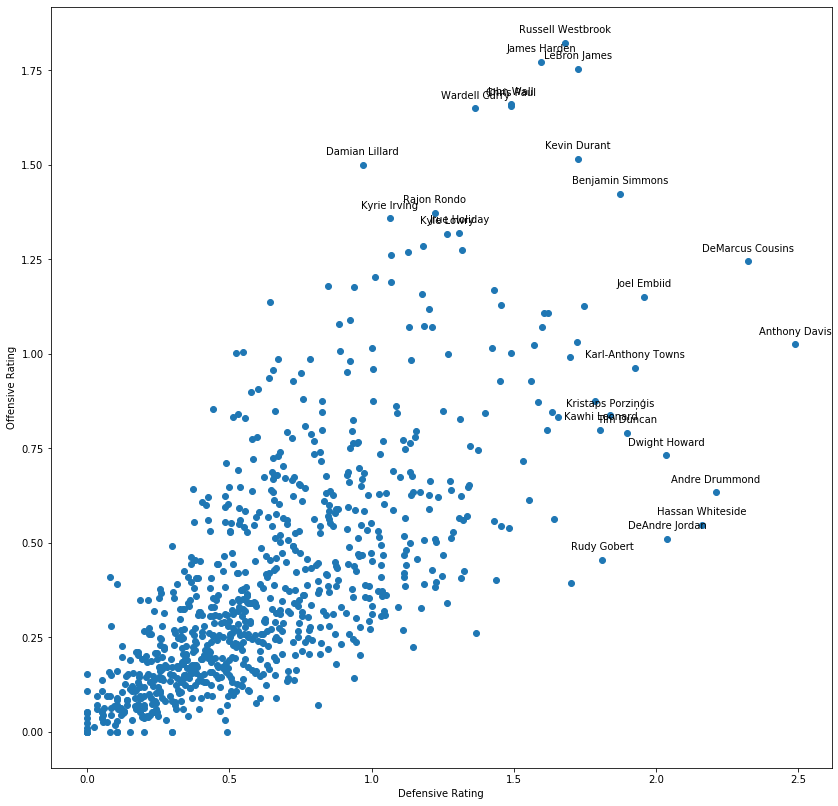

In [56]:
offensive_ratings = plyavg_6years_normalized['playOR']
defensive_ratings = plyavg_6years_normalized['playDR']
plt.figure(figsize=(14,14))
plt.scatter(defensive_ratings, offensive_ratings)
plt.xlabel('Defensive Rating')
plt.ylabel('Offensive Rating')

best_players = plyavg_6years_normalized[(plyavg_6years_normalized['playOR'] > 1.3) | (plyavg_6years_normalized['playDR'] > 1.8)]

for x,y,z in zip(best_players['playDR'], best_players['playOR'], best_players['name']):

    plt.annotate(z, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center') 

# PART 2: Looking at PER and Conferences

PER approx equation: 
[ FGM x 85.910

+ Steals x 53.897

+ 3PTM x 51.757

+ FTM x 46.845

+ Blocks x 39.190

+ Offensive_Reb x 39.190

+ Assists x 34.677

+ Defensive_Reb x 14.707

- Foul x 17.174

- FT_Miss x 20.091

- FG_Miss x 39.190

- TO x 53.897 ]

x (1 / Minutes).

In [25]:
#making per calculator
def per_calc(player, data):
    player_data = data[data["name"] == player]
    fgm = float(player_data['playFGM']) * 85.910
    stls = float(player_data['playSTL']) * 53.897
    thptm = float(player_data['play3PM']) * 51.757
    ftm = float(player_data['playFTM']) * 46.845
    blks = float(player_data['playBLK']) * 39.190
    orb = float(player_data['playORB']) * 39.190
    asst = float(player_data['playAST']) * 34.677
    drb = float(player_data['playDRB']) * 14.707
    foul = float(player_data['playPF']) * 17.174
    ftmss = (float(player_data['playFTA']) - float(player_data['playFTM']) )* 20.091
    fgmss = (float(player_data['play2PA']) - float(player_data['play2PM']) + float(player_data['play3PA']) - float(player_data['play3PM']) )  * 39.190
    to = float(player_data['playSTL']) * 53.897
    mins = 1/float(player_data['playMin'])
    
    per = (fgm + stls + thptm + ftm + blks + orb + asst + drb - foul -ftmss - fgmss - to) * mins
    return per


per_calc("Trevor Ariza", plyavg_1213)


14.630351864406784

In [43]:
cbb = pd.read_csv("final_proj_data/basketball/cbb.csv") 
cbb["TEAM"].unique()
plyavg_6years["college"].unique()
cbb["TEAM"].unique()
cbb

# getting college conf dataframe

college_conf = pd.read_csv("final_proj_data/basketball/college_conf.csv") 
"Baylor University" in list(college_conf["college"])
college_conf["college"]

0              Pepperdine University
1                  Baylor University
2              University of Arizona
3             University of Kentucky
4          University of Connecticut
                   ...              
190            Seton Hall University
191              Marshall University
192      Western Michigan University
193      Virginia Military Institute
194    South Dakota State University
Name: college, Length: 195, dtype: object

In [52]:
#function for college conference picking
def college_conf_picker(college):
    if college in list(college_conf["college"]):
        return college_conf[college_conf["college"] == college]["conference"].iloc[0]
    else:
        return None

    
#making a dataframe that contains conferences and approximate PER    
pre_conf = plyavg_6years
pre_conf["college_conf"] = pre_conf["college"].apply(college_conf_picker)
pre_conf["PER"] = pre_conf["name"].apply(lambda x: per_calc(x, pre_conf))
pre_conf
per_conf_all_college = pre_conf[pre_conf["college"].notnull()]
per_conf_all_college

,name,college,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,playFGM,...,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB,playMin,college_conf,PER
0,A.J. Price,University of Connecticut,4.807885,1.943336,0.637090,0.294631,0.017544,0.678732,4.719234,1.821557,...,0.192397,0.694075,0.491678,0.159176,0.205787,0.990184,1.195971,12.831036,American Athletic Conference,13.699678
1,Trevor Ariza,"University of California, Los Angeles",12.103167,2.088886,1.323467,1.614794,0.255541,2.000694,10.042414,4.213319,...,0.349826,1.765199,1.439990,0.497832,0.803781,4.169699,4.973480,33.429606,Pac-12 Conference,13.494568
2,Emeka Okafor,University of Connecticut,7.034080,0.742454,0.927215,0.438656,0.968111,1.494645,6.175024,2.999026,...,0.000000,1.631938,1.036027,0.382426,2.163340,4.517770,6.681110,19.775560,American Athletic Conference,18.152745
3,Bradley Beal,University of Florida,18.175102,3.487441,2.094804,1.067268,0.347989,2.050365,15.375631,6.764724,...,0.373266,3.377208,2.652205,0.617191,0.776913,3.158835,3.935747,33.831269,Southeastern Conference,18.704895
4,Trevor Booker,Clemson University,6.296498,1.041318,0.887654,0.553561,0.435659,1.876773,5.175600,2.634173,...,0.076435,1.417673,0.902438,0.295182,1.902175,3.154964,5.057139,19.125992,Atlantic Coast Conference,16.053067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,Jawun Evans,Oklahoma State University,4.812500,2.083333,0.937500,0.791667,0.125000,2.020833,5.250000,1.854167,...,0.149554,1.020833,0.791667,0.282640,0.187500,1.562500,1.750000,16.208333,Big 12 Conference,9.108202
886,Tyler Cavanaugh,George Washington University,4.692308,0.692308,0.358974,0.230769,0.102564,1.564103,3.897436,1.717949,...,0.287177,0.538462,0.435897,0.205128,1.153846,2.102564,3.256410,13.358974,Atlantic 10 Conference,14.994230
889,C.J. Williams,North Carolina State University,5.500000,1.131579,0.526316,0.815789,0.342105,1.657895,5.184211,2.289474,...,0.227629,0.421053,0.342105,0.127192,0.315789,1.157895,1.473684,18.526316,Atlantic Coast Conference,9.782163
898,Torrey Craig,University of South Carolina Upstate,4.179487,0.641026,0.487179,0.307692,0.384615,1.615385,3.512821,1.589744,...,0.226495,0.897436,0.564103,0.230769,1.025641,2.230769,3.256410,16.102564,Big South Conference,11.554726


# Failed attempts 

In [21]:
#average stats by college
#preliminary data cleaning and preperation
college_sum = college.groupby(['college']).sum()[['NBA__3ptpct', 'NBA_ppg']]
college_sum['num_players'] = college.groupby(['college']).count()[['active_from']]
college_sum.rename(columns = {'NBA__3ptpct' : 'total NBA__3ptpct', 'NBA_ppg' : 'total NBA_ppg'}, inplace = True)
college_sum['average NBA__3ptpct'] = college_sum['total NBA__3ptpct'] / college_sum['num_players']
college_sum['average NBA_ppg'] = college_sum['total NBA_ppg'] / college_sum['num_players']


In [22]:
#college_sum.sort_values(by=["average NBA__3ptpct"], ascending = False)
#college_sum.sort_values(by=["average NBA_ppg"], ascending = False)